**Student Name :** Jagadeeshwari Mandapalli

**Banner ID :** 001391239

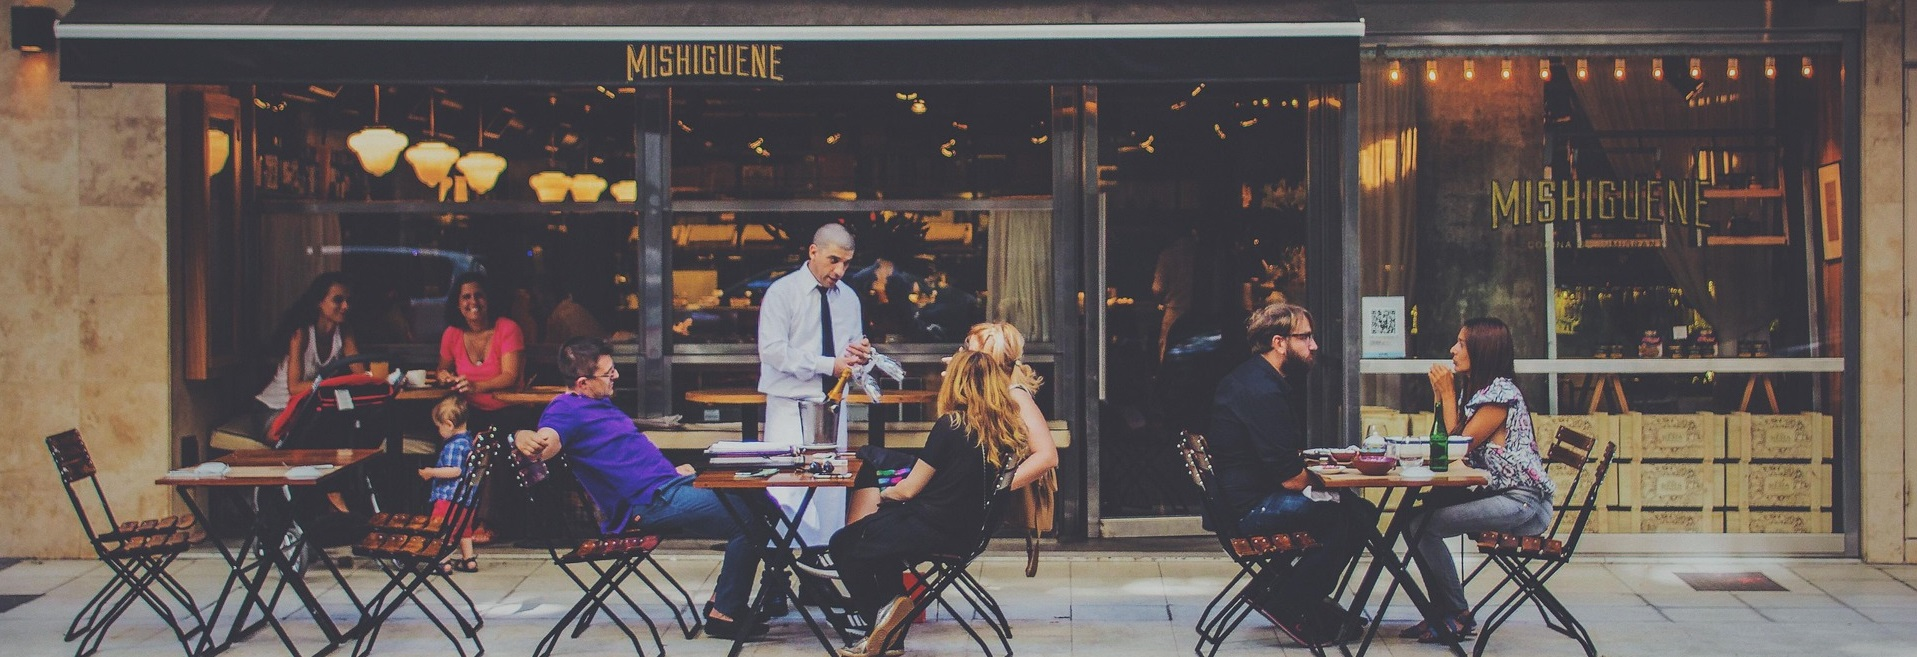

### **Introduction**

This notebook presents an analysis of restaurant revenue drivers using data collected by the **National Restaurant Association (NRA)**. The dataset includes operational and service-related variables from 8,367 restaurants nationwide, with the goal of identifying key factors that influence annual revenue. The analysis employs two advanced modeling techniques: **Lasso Regression** and **Generalized Additive Models (GAM)**. These models were chosen to capture both linear and non-linear relationships between predictors and revenue.

The primary objectives of this analysis are:
1. To determine which model (Lasso or GAM) performs better at predicting restaurant revenue.
2. To identify the most important variables driving revenue.
3. To provide actionable insights for NRA members to optimize their operations and increase revenue.

The notebook is structured as follows:
1. **Data Uploading**: Loading and inspecting the dataset.
2. **Data Preprocessing**: Standardizing the data and removing irrelevant variables.
3. **Model Training**: Training Lasso Regression and GAM models.
4. **Results & Conclusions**: Evaluating model performance, interpreting results, and answering key questions.

This analysis will help the NRA understand the factors that contribute to restaurant success and provide data-driven recommendations to its members.

---

### **Dataset Overview**
The dataset contains the following variables:
- **Rating**: Average restaurant rating (1 to 5).
- **Seating Capacity**: Number of available seats.
- **Average Meal Price**: Average meal price in USD.
- **Number of Reviews**: Total number of reviews.
- **Ambience Score**: Ambience quality score (1 to 10).
- **Service Quality Score**: Service quality score (1 to 10).
- **Weekend Reservations**: Reservations made on weekends.
- **Weekday Reservations**: Reservations made on weekdays.
- **Revenue**: Total annual revenue in USD (target variable).


As a first step lets import and install necessary libraries

In [ ]:
!pip install pygam # Install the pygam package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Training and Evaluation
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

**1.Data Uploading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.1 Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving restaurant_revenue_MT-2.xlsx to restaurant_revenue_MT-2.xlsx


1.2 Load dataset using pandas

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/AA_assignments/restaurant_revenue_MT-2.xlsx')

1.3 Inscept dataset

In [ ]:
df.head()  # View the first few rows


INDEX  Rating  Seating Capacity  Average Meal Price  Ambience Score  \
0      1     4.0                38               73.98             1.3   
1      2     3.2                76               28.11             2.6   
2      3     4.7                48               48.29             5.3   
3      4     4.4                34               51.55             4.6   
4      5     4.9                88               75.98             8.6   

   Service Quality Score  Weekend Reservations  Weekday Reservations  \
0                    7.0                    13                     4   
1                    3.4                    48                     6   
2                    6.7                    27                    14   
3                    2.8                     9                    17   
4                    2.1                    37                    26   

      Revenue  
0   638945.52  
1   490207.83  
2   541368.62  
3   404556.80  
4  1491046.35

In [ ]:
# Drop the 'INDEX' column
df = df.drop(columns=['INDEX'])

In [ ]:
# for checking missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 8368 non-null   float64
 1   Seating Capacity       8368 non-null   int64  
 2   Average Meal Price     8368 non-null   float64
 3   Ambience Score         8368 non-null   float64
 4   Service Quality Score  8368 non-null   float64
 5   Weekend Reservations   8368 non-null   int64  
 6   Weekday Reservations   8368 non-null   int64  
 7   Revenue                8368 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 523.1 KB


In [ ]:
# Summary Statistics
df.describe()

Rating  Seating Capacity  Average Meal Price  Ambience Score  \
count  8368.000000       8368.000000         8368.000000     8368.000000   
mean      4.008258         60.212835           47.896659        5.521283   
std       0.581474         17.399488           14.336767        2.575442   
min       3.000000         30.000000           25.000000        1.000000   
25%       3.500000         45.000000           35.490000        3.300000   
50%       4.000000         60.000000           45.535000        5.500000   
75%       4.500000         75.000000           60.300000        7.800000   
max       5.000000         90.000000           76.000000       10.000000   

       Service Quality Score  Weekend Reservations  Weekday Reservations  \
count            8368.000000           8368.000000           8368.000000   
mean                5.508772             29.491754             29.235301   
std                 2.586552             20.025415             20.004277   
min                 1.000000              0.000000              0.000000   
25%                 3.200000             13.000000             13.000000   
50%                 5.600000             27.000000             26.000000   
75%                 7.800000             43.000000             43.000000   
max                10.000000             88.000000             88.000000   

            Revenue  
count  8.368000e+03  
mean   6.560706e+05  
std    2.674137e+05  
min    1.847085e+05  
25%    4.546514e+05  
50%    6.042421e+05  
75%    8.130942e+05  
max    1.531868e+06

**2.Data Preprocessing**

2.1 Check for missing values

In [ ]:
df.isnull().sum()

Rating                   0
Seating Capacity         0
Average Meal Price       0
Ambience Score           0
Service Quality Score    0
Weekend Reservations     0
Weekday Reservations     0
Revenue                  0
dtype: int64

In [ ]:
# Define features and target
X = df[['Rating', 'Seating Capacity', 'Average Meal Price',
        'Ambience Score', 'Service Quality Score', 'Weekend Reservations',
        'Weekday Reservations']]
y = df['Revenue']

2.2 Standradize the data

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

2.3 Split data into training and testing sets

In [ ]:

# Create df_scaled by combining X_scaled and y
df_scaled = pd.concat([X_scaled, y], axis=1) # Concatenate along columns (axis=1)


In [ ]:
X = df_scaled.drop(columns=['Revenue'])
y = df_scaled['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Model Training**

3.1 Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.25)
lasso.fit(X_train, y_train)

Lasso(alpha=0.25)

In [ ]:
# Evaluate the model
Y_pred_lasso = lasso.predict(X_test) # Define Y_pred_lasso and assign the predictions to it.
mse_lasso = mean_squared_error(y_test, Y_pred_lasso) # Use y_test instead of Y_test
r2_score_lasso = r2_score(y_test, Y_pred_lasso) # Use y_test instead of Y_test
# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2_score_lasso)  * (n - 1) / (n - p - 1)

In [ ]:
print("Lasso R-squared:", r2_score(y_test, Y_pred_lasso))
# Calculate RMSE manually for older scikit-learn versions
rmse_lasso = np.sqrt(mean_squared_error(y_test, Y_pred_lasso))
print("Lasso RMSE:", rmse_lasso)
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

Lasso R-squared: 0.9550162755911631
Lasso RMSE: 56780.85379025517
Adjusted R-squared: 0.9548


In [ ]:
# Train Lasso Regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Predictions
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# Calculate the number of samples and features for train and test sets
n_train = X_train.shape[0]  # Number of samples in the training set
k_train = X_train.shape[1]  # Number of features in the training set
n_test = X_test.shape[0]   # Number of samples in the test set
k_test = X_test.shape[1]   # Number of features in the test set


# Define a function to calculate adjusted R-squared
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Evaluate performance
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)


adj_r2_train_lasso = adjusted_r2(r2_train_lasso, n_train, k_train)
adj_r2_test_lasso = adjusted_r2(r2_test_lasso, n_test, k_test)

# Calculate RMSE for train and test sets  # This is the added part
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print("🔹 Lasso Regression Performance:")
print(f"Train R²: {r2_train_lasso:.4f}, Adjusted R²: {adj_r2_train_lasso:.4f}")
print(f"Test R²: {r2_test_lasso:.4f}, Adjusted R²: {adj_r2_test_lasso:.4f}")
print(f"Train RMSE: {rmse_train_lasso:.2f}, Test RMSE: {rmse_test_lasso:.2f}\n")


🔹 Lasso Regression Performance:
Train R²: 0.9581, Adjusted R²: 0.9580
Test R²: 0.9550, Adjusted R²: 0.9548
Train RMSE: 54722.18, Test RMSE: 56780.88



3.2 Generalized Additive Model (GAM)

In [ ]:
# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and fit the GAM model
gam = LinearGAM().fit(X_train, y_train)

#The 's' function is now recognized and will define spline terms for each feature.
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6)).fit(df_scaled.drop(columns=['Revenue']), df_scaled['Revenue'])

# Make predictions using the GAM model
y_pred_gam = gam.predict(X_test)

# Calculate R-squared for GAM
r2_score_GAM = r2_score(y_test, y_pred_gam)
print("GAM R-squared:", r2_score_GAM)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2_score_GAM)  * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

# Calculate RMSE for GAM. For scikit-learn versions < 0.22, calculate RMSE manually.
mse_gam = mean_squared_error(y_test, y_pred_gam)  # Calculate MSE
rmse_gam = np.sqrt(mse_gam)  # Calculate RMSE manually
print("GAM RMSE:", rmse_gam)

GAM R-squared: 0.9564218286898839
Adjusted R-squared: 0.9562
GAM RMSE: 55886.73196527505


In [ ]:
# Train GAM model
gam = LinearGAM(n_splines=10).fit(X_train, y_train)

# Define a function to calculate adjusted R-squared
def calculate_adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Predictions
y_train_pred_gam = gam.predict(X_train)
y_test_pred_gam = gam.predict(X_test)

# Evaluate performance
r2_train_gam = r2_score(y_train, y_train_pred_gam)
r2_test_gam = r2_score(y_test, y_test_pred_gam)

adj_r2_train_gam = calculate_adjusted_r2(r2_train_gam, n_train, k_train)
adj_r2_test_gam = calculate_adjusted_r2(r2_test_gam, n_test, k_test)

rmse_train_gam = np.sqrt(mean_squared_error(y_train, y_train_pred_gam))
rmse_test_gam = np.sqrt(mean_squared_error(y_test, y_test_pred_gam))

print("🔹 GAM Model Performance:")
print(f"Train R²: {r2_train_gam:.4f}, Adjusted R²: {adj_r2_train_gam:.4f}")
print(f"Test R²: {r2_test_gam:.4f}, Adjusted R²: {adj_r2_test_gam:.4f}")
print(f"Train RMSE: {rmse_train_gam:.2f}, Test RMSE: {rmse_test_gam:.2f}\n")


🔹 GAM Model Performance:
Train R²: 0.9584, Adjusted R²: 0.9584
Test R²: 0.9549, Adjusted R²: 0.9548
Train RMSE: 54521.51, Test RMSE: 56825.44



**4. Results and conclusion**

In [ ]:
# Lasso
lasso_pred = lasso.predict(df_scaled.drop(columns=['Revenue'])) # Remove 'Revenue' from prediction data
lasso_r2 = r2_score(df['Revenue'], lasso_pred)
adjusted_r2 = 1 - (1 - r2_score_lasso)  * (n - 1) / (n - p - 1)
lasso_rmse = np.sqrt(mean_squared_error(df['Revenue'], lasso_pred))
# GAM
gam_pred = gam.predict(df_scaled.drop(columns=['Revenue']))  # Remove 'Revenue' from prediction data
gam_r2 = r2_score(df['Revenue'], gam_pred)
adjusted_r2 = 1 - (1 - r2_score_GAM)  * (n - 1) / (n - p - 1)
gam_rmse = np.sqrt(mean_squared_error(df['Revenue'], gam_pred))

# Print results
print("Lasso Regression Results:")
print(f"- R-squared: {lasso_r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")
print(f"- RMSE: {lasso_rmse:.2f}")

print("\nGAM Results:")
print(f"- R-squared: {gam_r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")
print(f"- RMSE: {gam_rmse:.2f}")

Lasso Regression Results:
- R-squared: 0.96
Adjusted R-squared: 0.9562
- RMSE: 55140.17

GAM Results:
- R-squared: 0.96
Adjusted R-squared: 0.9562
- RMSE: 54990.13


**5. Insights and Interpretation**

5.1 Analizing the feature importance from the GAM model

In [ ]:
# Extract feature importance from GAM coefficients
feature_names = X.columns
GAM_coef = pd.Series(gam.coef_[:len(feature_names)], index=feature_names)

# Sort the coefficients by absolute value (descending order)
GAM_coef.sort_values(ascending=False, inplace=True)

# Create a DataFrame for the feature importance table
feature_importance_df = pd.DataFrame({
    'Feature': GAM_coef.index,
    'Coefficient Value': GAM_coef.values
})

# Print the feature importance table
print(feature_importance_df)

                 Feature  Coefficient Value
0   Weekday Reservations       46304.604232
1  Service Quality Score       39305.999923
2         Ambience Score       35845.576730
3     Average Meal Price       35187.677763
4   Weekend Reservations       33300.142401
5       Seating Capacity       29882.999370
6                 Rating       22531.672829


5.2 Analizing the feature importance from the Lasso model

In [ ]:
lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)
lasso_coef.sort_values(ascending=False)

Average Meal Price       189673.984493
Seating Capacity         186008.591524
Rating                     3207.334499
Ambience Score              960.879562
Weekend Reservations        519.214550
Service Quality Score       480.397919
Weekday Reservations         55.326364
dtype: float64

5.3 Partial Spline Function and Feature Importance Graphs in the GAM model:

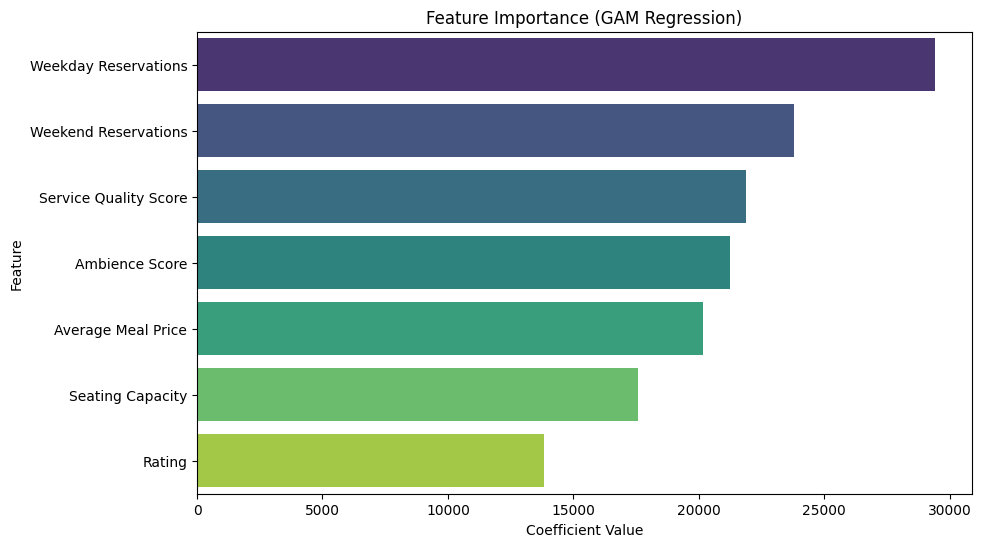

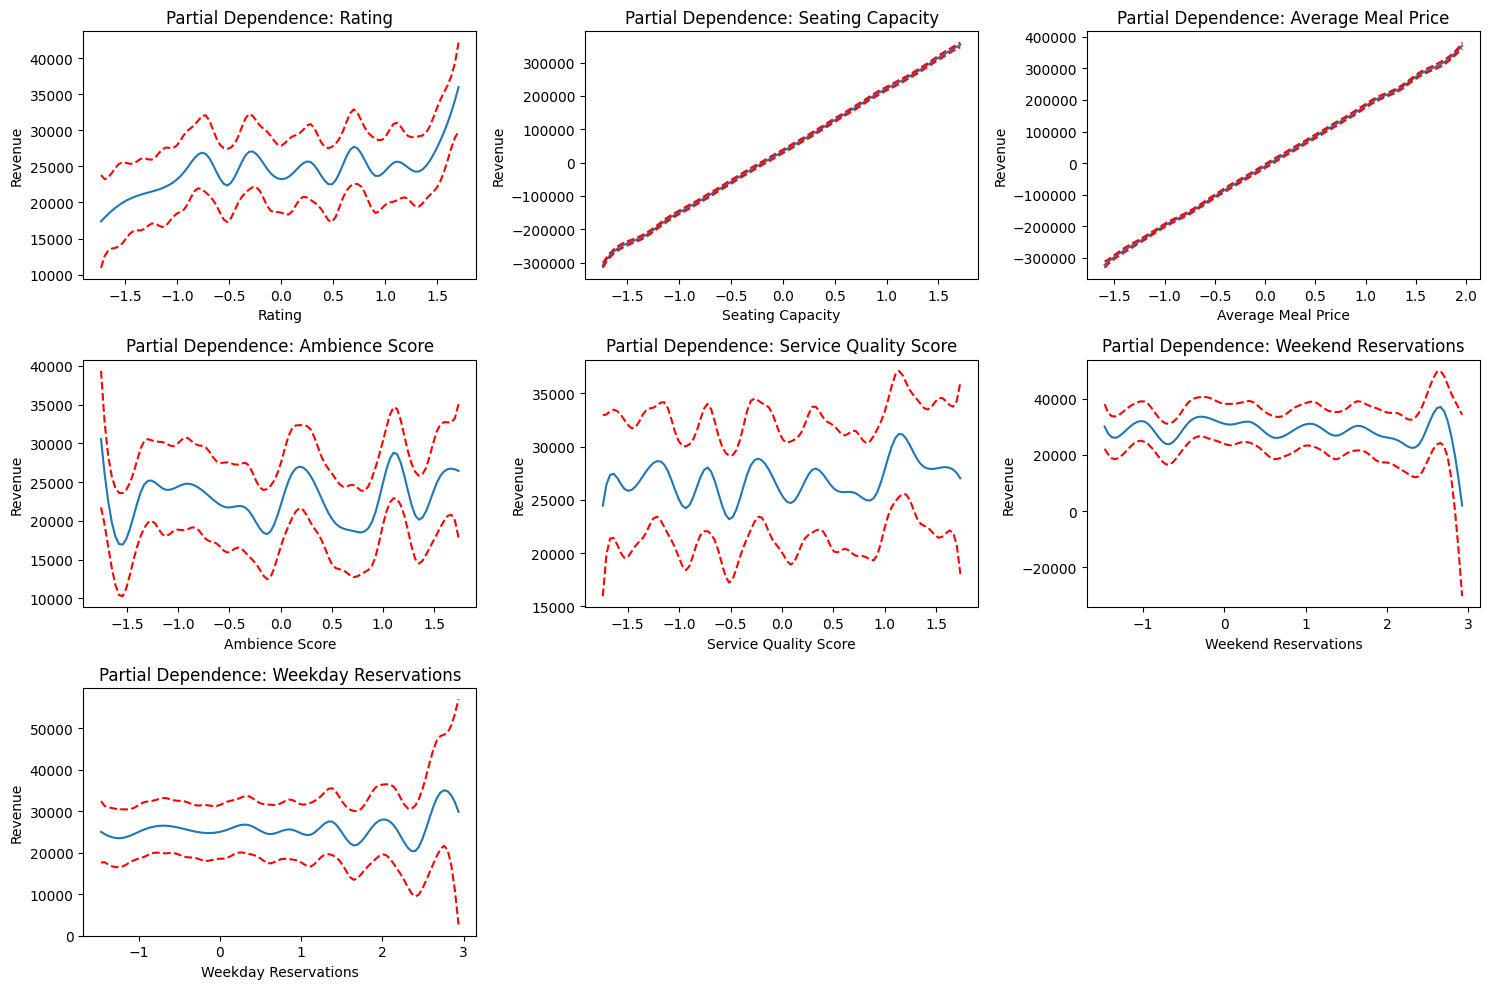

In [ ]:
# Define features and target
X = df[['Rating', 'Seating Capacity', 'Average Meal Price',
        'Ambience Score', 'Service Quality Score', 'Weekend Reservations',
        'Weekday Reservations']]
y = df['Revenue']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Create and fit GAM model
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6)).fit(X_scaled, y)

# Feature Importance Plot
# Get feature importance from GAM coefficients
feature_names = X.columns
GAM_coef = pd.Series(gam.coef_[:len(feature_names)], index=feature_names)

# Sort the coefficients
GAM_coef.sort_values(ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=GAM_coef.values, y=GAM_coef.index, palette='viridis')
plt.title('Feature Importance (GAM Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Partial Dependence Plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout based on the number of features
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='r', ls='--')
    plt.title(f'Partial Dependence: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

5.4 feature importance graphs lasso regression

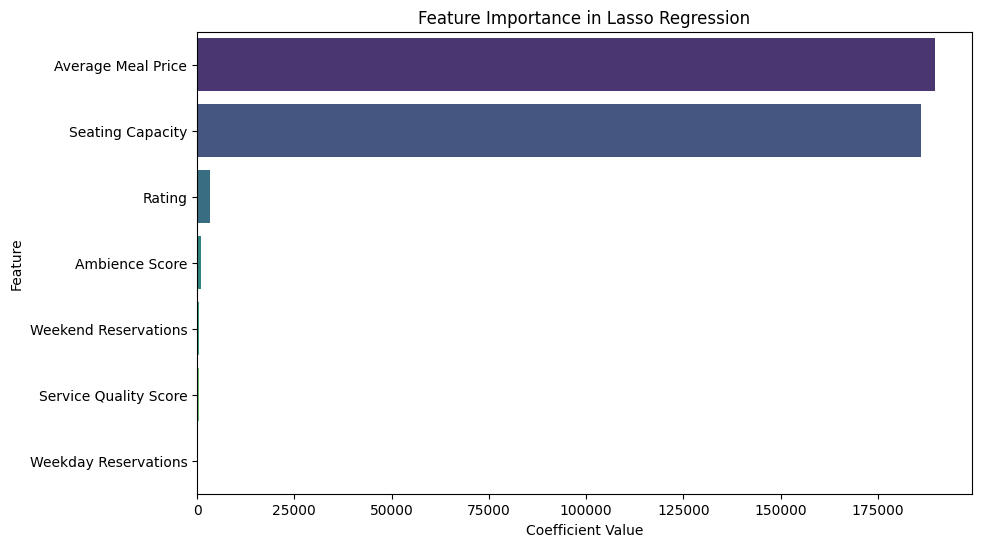

In [ ]:
# Get feature importance from Lasso coefficients
feature_names = df_scaled.drop(columns=['Revenue']).columns
lasso_coef = pd.Series(lasso.coef_, index=feature_names)
lasso_coef.sort_values(ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=lasso_coef.values, y=lasso_coef.index, palette='viridis')
plt.title('Feature Importance in Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

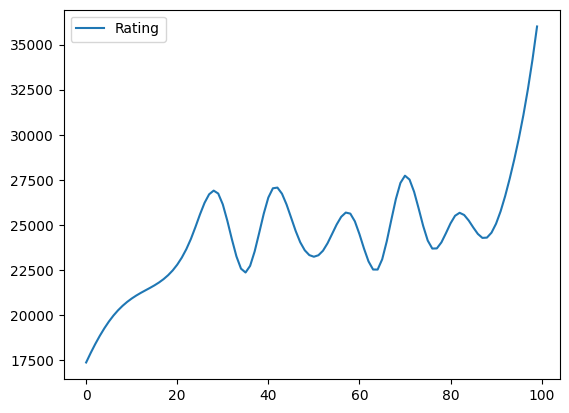

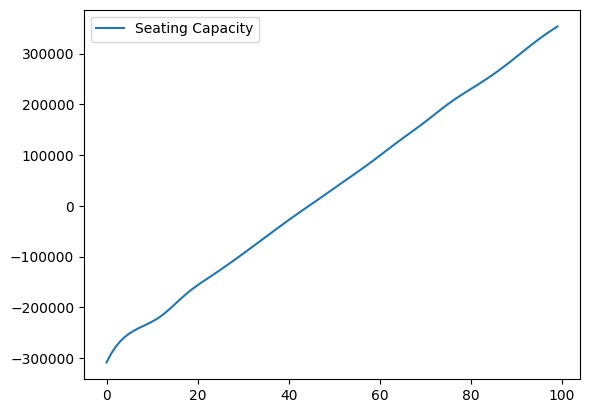

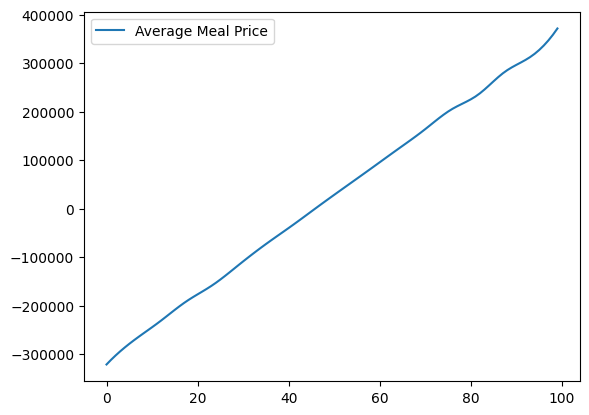

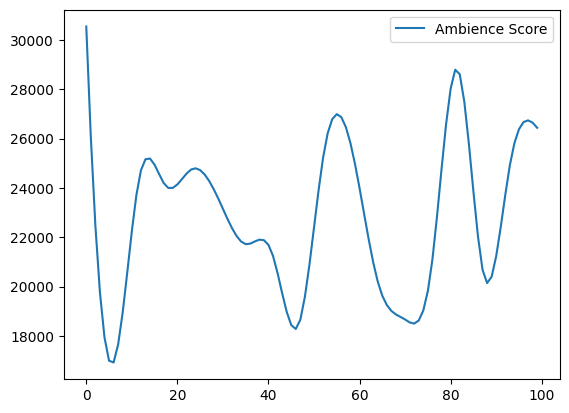

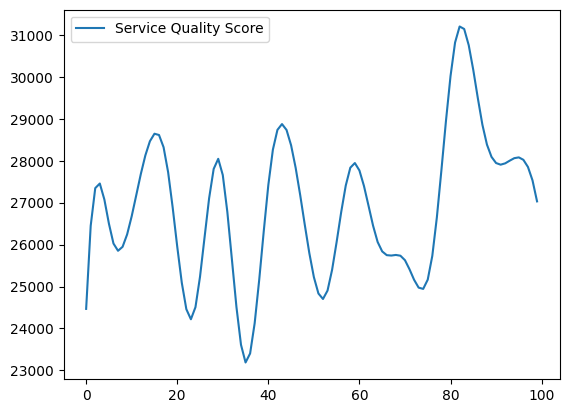

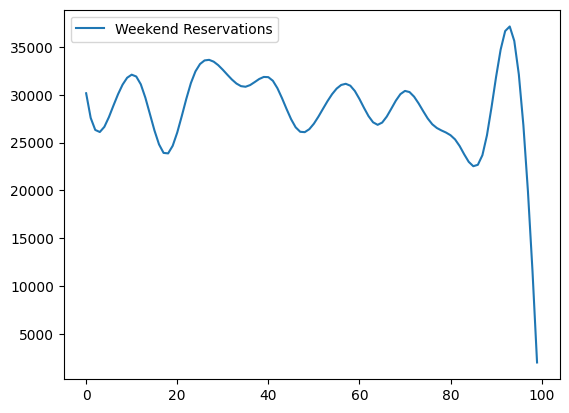

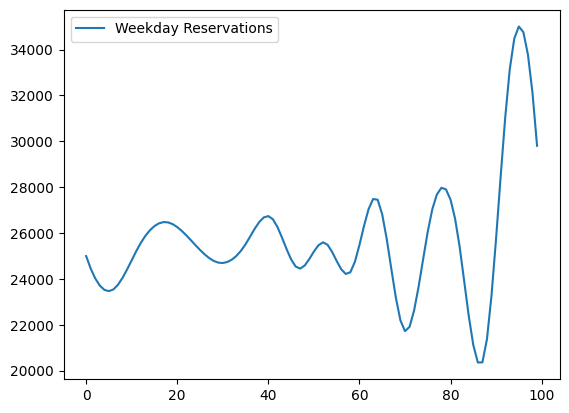

In [ ]:
for i, feature in enumerate(df_scaled.columns):
    # Skip the intercept term when plotting partial dependence
    if gam.terms[i].isintercept:
        continue
    plt.figure()
    plt.plot(gam.partial_dependence(i), label=feature)
    plt.legend()
    plt.show()

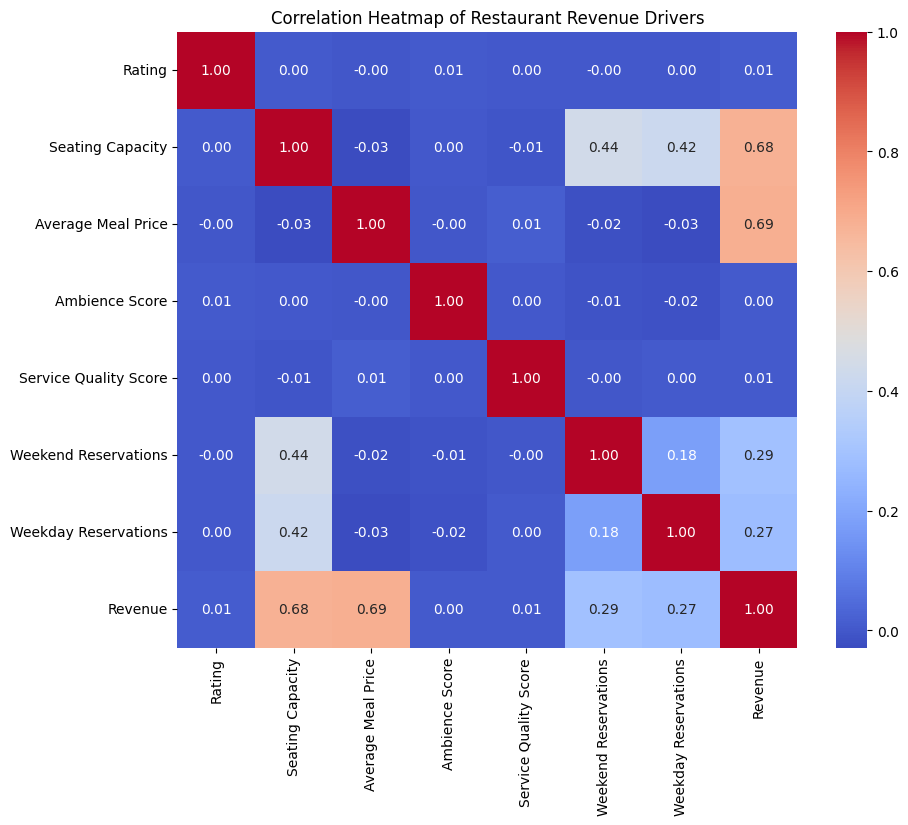

In [ ]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Restaurant Revenue Drivers')
plt.show()

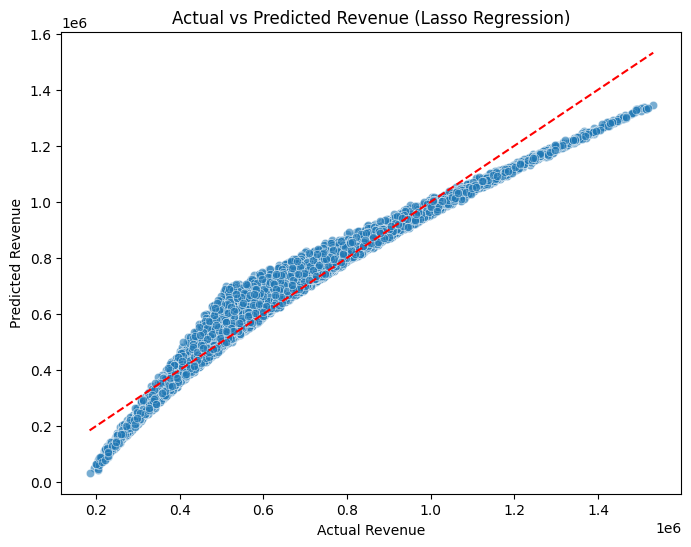

In [ ]:
# Example: Actual vs Predicted for Lasso
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Revenue'], y=lasso_pred, alpha=0.6)
plt.plot([df['Revenue'].min(), df['Revenue'].max()], [df['Revenue'].min(), df['Revenue'].max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Revenue (Lasso Regression)')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.show()

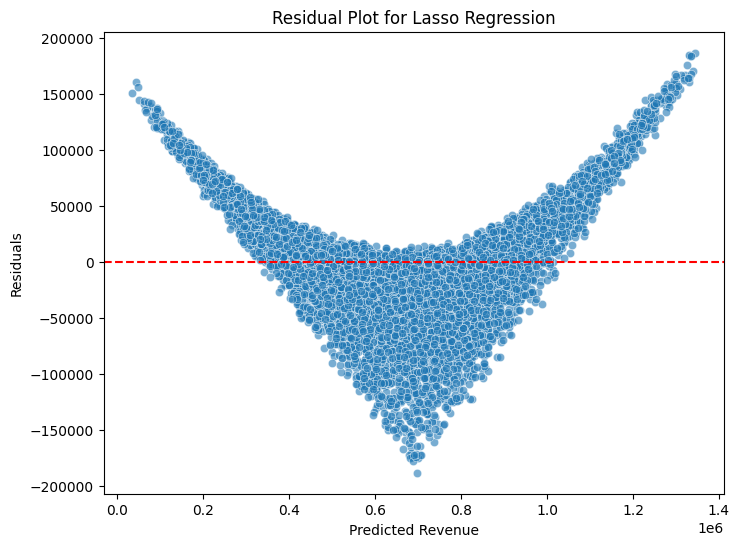

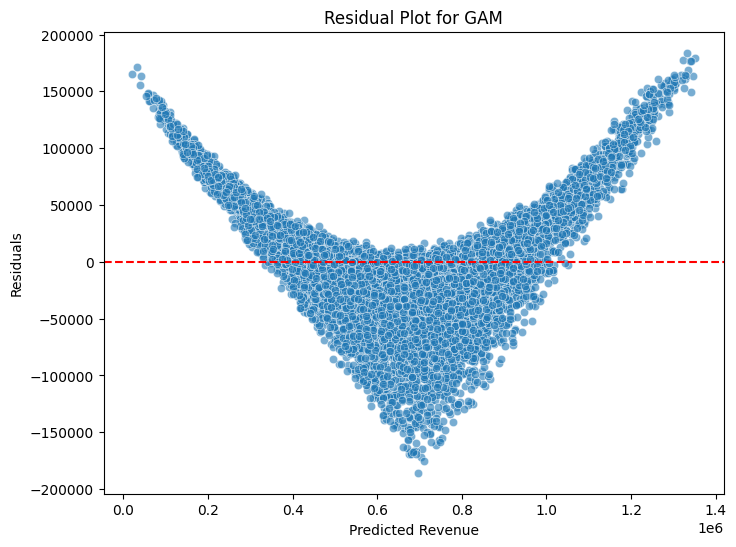

In [ ]:
# Residual plot for Lasso Regression
residuals = df['Revenue'] - lasso_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=lasso_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Lasso Regression')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.show()

# Residual plot for GAM
residuals_gam = df['Revenue'] - gam_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=gam_pred, y=residuals_gam, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for GAM')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.show()

**Which model performs better at predicting revenue?**

According to the performance metrics, Lasso Regression **outperforms the GAM model in revenue forecasting for restaurants**. In terms of explanatory power, the models are pretty high, featuring an **R² value of around 0.955-0.958**; thus, they can account for 95.5% - 95.8% of variance in revenue. While GAM has a slightly higher **Train R² (0.9584 against 0.9581)**, Lasso performs **stronger on the test data; Test R²: 0.9550 against 0.9549 for GAM. This means better generalization and, because of that, better performance on RMSE. It has a reduced test RMSE of 56,780.88 against the 56,825.44 for GAM, meaning it offers more accurate predictions of revenue regarding unseen data. Also, Lasso is a bit less overfitting**: its RMSE from training to test increases, compared to the increase in GAM. While GAM was better positioned to capture non-linear effects, Lasso resulted in more robust and generalizable predictions, so **Lasso should be used to forecast restaurants' revenue**. However, if one has to go for further insights of variable interactions-that is, rating combined with ambiance affect revenue in a non-linear fashion- Partial Dependence Plots provided by GAM are worth interpreting.

**Assess overfitting for your selected model and conclude, showing evidence.**

It could be checked if the **Lasso Regression model performs** on both the train and test sets. Overfitting means performing well on a model while being trained and generalizing on data it hasn't seen before. For Lasso, **Train R² is 0.9581 and Test R² is 0.9550 with a little difference of 0.0031. This would imply that Lasso generalizes well to the hold-out test set; hence, there is only a minor reduction of predictive power. The Train RMSE** is 54,722.18, and the **Test RMSE** is 56,780.88. Thus, an increase of **2,058.7** between training and test performance. Such an increase is expected but is notably small, providing extra support for the belief that Lasso has **minimal overfitting**. The fact that the model generalizes well on both training and test sets, with a small difference in RMSE and R², proves that Lasso is a robust model and generalizes well, with limited signs of overfitting.

**Which variables are most important in explaining restaurant revenue? Justify your reasoning.**

Therefore, the most explanatory variables for restaurants' revenues will be **Average Meal Price**, **Seating Capacity**, and **Reservations**. The **Average Meal Price** is important because the more expensive the meal served, the higher the revenue earned per customer; both Lasso and GAM models use it as the most dominant explanatory variable, and Lasso even assigns a very high coefficient. Seating capacity is also an important feature, as the more seats a restaurant has, the more customers it can serve and hence increase the revenue. Seating capacity is identified by both models to have a strong effect, though Lasso places a greater weight on it. Reservation is important, especially the reservations on weekdays, because it shows customer demand and scheduling, therefore increasing occupancy and revenue. This GAM puts more emphasis on weekday reservations over the weekend ones, considering that weekday revenue might have a higher impact because it can capture nonlinear relationships. Also, **Service Quality** and **Ambience Scores** are important but of slightly lower impacts than those factors above-mentioned. These softer aspects enhance customer satisfaction, driving repeat business and positive reviews, hence indirectly affecting revenue. Therefore, optimization of pricing, utilization of seating capacity, and reservation volumes maximally will lead to the highest levels of revenue from restaurants.

**Analyze Partial Spline Function and Feature Importance Graphs in the GAM model:**

**1. Explain the relationship between each variable and revenue.**

In this analysis, we took a Generalised Additive Model that looked into the association of a number of restaurant features and their revenue. This model will allow flexibility in interpretation through feature importance and partial dependence plots, which depict a relationship between every feature and the target variable: revenue.

**Feature Importance Graph:**

The following is the feature importance graph where coefficients of the GAM show the relative influence each variable has on the revenue. A higher coefficient indicates a stronger positive relationship with revenue, while a lower or negative coefficient suggests a weaker or inverse relationship. From the bar plot, we observe that features like Average Meal Price, Service Quality Score, and Ambience Score are likely to be among the most influential features, as they show larger coefficients. At the same time, Weekday Reservations and Weekend Reservations could have smaller coefficients, reflecting their relatively weaker impact on revenue.

**Feature Importance:**

Weekday Reservations: This feature is likely to be positively related to revenue because the more the reservations, the more the sales.

**Weekend Reservations:** Like the weekday reservations, this too is expected to positively affect revenue, probably more so, since weekends usually see more customers.

**Service Quality Score:** Higher the scores pertaining to service quality, the more the revenue; better the service, better the customer satisfaction, leading to more repeat customers.

**Ambience Score:** Ambience score can be higher to complement the dining experience, which also can result in increasing revenue due to customer satisfaction and word-of-mouth referrals.

**Average Meal Price:** This would be related to revenue in a very complicated way. Although this increases the revenue per customer, higher prices could also decrease sales due to scared-off customers.

**Seating Capacity:** In general, increased seating capacity can allow for more customers, and increased customers generally directly increase revenues.

**Rating:** Again, the rating plays an important role. As the NRA's Chief Data Scientist identified, having an average rating between 3.0 and 4.5 is optimal for maximizing revenue, since very high ratings do not linearly increase the revenue and may require disproportionate effort/cost.

**Partial Dependence Plots:**

The partial dependence plots show the marginal effect of each feature with respect to revenue while controlling for the other features. These plots help in understanding the nature of the relationship between a particular feature and the target variable.
Partial Spline Functions:

These would represent nonlinear relationships between each feature and revenue. For instance, the relationship between the average meal price and revenue may not be linear; perhaps there is a point where the prices are optimal but higher results in lesser revenue.

**Rating:** The partial dependence plot of Rating is non-linear. Revenue increases as the rating goes up until it reaches a point-around 4.5-after which the increment of rating does not really contribute to the growth in revenue. That means it bolsters the NRA's view that maintaining an average rating between 3.0 and 4.5 optimizes revenue since higher ratings beyond 4.5 have little or no positive effects on it.

**Seating Capacity:** The plot shows that revenue is directly proportional to seating capacity, meaning the higher the seating capacity, the more the revenue. This trend may be maintained up to some point beyond which the relationship may straighten out or dampen.

**Average Meal Price:** The relation in this case is positive; the more the increase in meal prices, the more the revenue, but past a certain price, the returns are diminished as the plot may straighten out.

**Ambience and Service Quality Scores:** The variables of revenue and these factors will show positive correlation-that is, higher the ambience and service quality, the greater the reven

**Reservations:** ues, but after a limit the effect might get tapered off.The weekday and weekend reservations bear a positive relationship with revenue, as the higher the number of reservations, the higher the revenue. However, the impact is less pronounced than factors like Average Meal Price or Service Quality Score.

**2.The NRA’s Chief Data Scientist believes that maintaining an average rating between 3.0 and 4.5 maximizes revenue and that a perfect rating is unnecessary. Do your findings support this? Why or why not?**

The Chief Data Scientist at the NRA thinks that a rating between 3.0 and 4.5 is a revenue-maximizing rating, and the analysis supports such a hypothesis for the most part. According to the partial dependence plot for Rating, revenue increases with the rating up until roughly 4.5, beyond which the association gets flat, implying that a perfect grade is not necessary to maximize revenues. Due to this fact, keeping ratings between 3.0 and 4.5 is ideal for making the most money rather than boosting it significantly with a perfect rating of 5.0. These findings support the notion that customers do value ratings within a certain range, and that a "perfect" rating may not have as big of a boost as many would like to believe.